# import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
fpath = r'C:\Users\Mei\City-Bikes'

In [3]:
df_clean = pd.read_pickle(os.path.join(fpath,'clean_data','citibike_clean_1.pkl'))

In [4]:
df_clean.shape

(50000, 18)

In [5]:
df_clean.head(3)

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1


# 2. Data reprocessing

### 2.1 only keep the non null records

In [6]:
df_keep = df_clean[df_clean['birth_year']>0]

In [7]:
df_keep['birth_year'] = df_keep['birth_year'].astype(int)

C:\Users\Mei\AppData\Local\Temp\ipykernel_10664\2684423964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_keep['birth_year'] = df_keep['birth_year'].astype(int)


### 2.2 select the numerical columns from df_keep

In [8]:
df_keep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43021 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  43021 non-null  object        
 1   bike_id                  43021 non-null  object        
 2   weekday                  43021 non-null  object        
 3   start_hour               43021 non-null  int64         
 4   start_time               43021 non-null  datetime64[ns]
 5   start_station_id         43021 non-null  object        
 6   start_station_name       43021 non-null  object        
 7   start_station_latitude   43021 non-null  float64       
 8   start_station_longitude  43021 non-null  float64       
 9   end_time                 43021 non-null  datetime64[ns]
 10  end_station_id           43021 non-null  object        
 11  end_station_name         43021 non-null  object        
 12  end_station_latitude     43021 n

In [9]:
list_num_all = ['start_hour','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','trip_duration','birth_year']

In [10]:
df_num_all = df_keep[list_num_all]

In [11]:
df_num_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43021 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_hour               43021 non-null  int64  
 1   start_station_latitude   43021 non-null  float64
 2   start_station_longitude  43021 non-null  float64
 3   end_station_latitude     43021 non-null  float64
 4   end_station_longitude    43021 non-null  float64
 5   trip_duration            43021 non-null  int64  
 6   birth_year               43021 non-null  int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 2.5 MB


In [12]:
df_num_all.head(3)

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,birth_year
0,18,40.754666,-73.991382,40.742388,-73.997262,993,1968
1,18,40.719392,-74.002472,40.728419,-73.987140,581,1983
2,19,40.760193,-73.991255,40.768254,-73.988639,361,1989


### 2.3 To avoid bias in clustering: 
#### 1) change the values in 'trip_duration' from seconds to minutes
#### 2) create a new column called 'age' based on 'birth_year'

#### Change the seconds to minutes in 'trip_duration'

In [13]:
# Change the values in trip_duration from seconds to minutes


result = []
for x in df_num_all['trip_duration']:
    y = float("{:.2f}".format(x/60))
    result.append(y)

In [14]:
result

[16.55,
 9.68,
 6.02,
 9.35,
 7.12,
 10.65,
 4.38,
 11.1,
 9.7,
 20.83,
 16.78,
 17.38,
 13.67,
 2.9,
 21.43,
 11.12,
 13.62,
 13.43,
 10.4,
 7.85,
 10.23,
 20.03,
 3.93,
 5.53,
 4.23,
 2.38,
 18.3,
 34.28,
 15.83,
 10.15,
 9.67,
 30.83,
 8.87,
 9.1,
 5.62,
 25.25,
 30.27,
 7.53,
 29.67,
 15.73,
 3.93,
 15.97,
 6.98,
 7.95,
 17.02,
 22.1,
 3.15,
 13.32,
 15.45,
 9.15,
 28.18,
 14.02,
 13.72,
 10.85,
 14.78,
 37.7,
 14.3,
 15.95,
 9.18,
 6.4,
 11.42,
 4.12,
 5.98,
 9.98,
 11.0,
 2.6,
 4.12,
 6.32,
 6.02,
 5.28,
 15.4,
 16.47,
 2.28,
 12.35,
 18.47,
 14.23,
 7.58,
 20.98,
 17.17,
 5.33,
 3.63,
 6.58,
 31.5,
 6.78,
 10.4,
 7.65,
 10.35,
 20.03,
 11.35,
 17.48,
 27.48,
 15.88,
 9.15,
 6.78,
 10.47,
 12.27,
 11.08,
 11.5,
 8.45,
 6.98,
 8.43,
 11.68,
 16.75,
 2.45,
 22.88,
 3.62,
 6.8,
 7.77,
 13.37,
 15.78,
 18.1,
 24.1,
 19.0,
 2.95,
 16.38,
 11.0,
 10.15,
 31.15,
 11.0,
 4.82,
 2.12,
 6.27,
 27.93,
 10.5,
 15.83,
 4.43,
 11.93,
 9.85,
 22.27,
 11.25,
 8.63,
 6.67,
 23.25,
 11.08,
 11.12,

In [15]:
df_num_all['trip_duration'] = result

C:\Users\Mei\AppData\Local\Temp\ipykernel_10664\1048398278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_all['trip_duration'] = result


In [16]:
df_num_all['trip_duration'].head()

0    16.55
1     9.68
2     6.02
3     9.35
5     7.12
Name: trip_duration, dtype: float64

#### Create 'age' column and remove the 'birth_year 'column

In [17]:
# add a 'age' column
df_num_all['age'] = 2013 - df_num_all['birth_year']

C:\Users\Mei\AppData\Local\Temp\ipykernel_10664\2125416561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_all['age'] = 2013 - df_num_all['birth_year']


In [18]:
df_num_all['age'].value_counts()

28    1837
32    1830
31    1810
29    1798
30    1785
      ... 
84       1
96       1
87       1
89       1
92       1
Name: age, Length: 76, dtype: int64

In [19]:
df_num_all = df_num_all.drop(columns = ['birth_year'])

# 3. Clustering 

## 3.1 Determine the optimal number for clustering 

In [20]:
num_k = range(1,10) # range(x,y) [x,y)
kmeans = [KMeans(n_clusters = i) for i in num_k]

In [21]:
score = [kmeans[j].fit(df_num_all).score(df_num_all) for j in range(len(kmeans))]

In [22]:
score

[-9611230.254975725,
 -5934015.979938422,
 -4237538.698605077,
 -3537444.2205709405,
 -3097215.1569479685,
 -2747337.27192496,
 -2464179.2552373614,
 -2271639.0856591575,
 -2092581.978465365]

Text(0, 0.5, 'score')

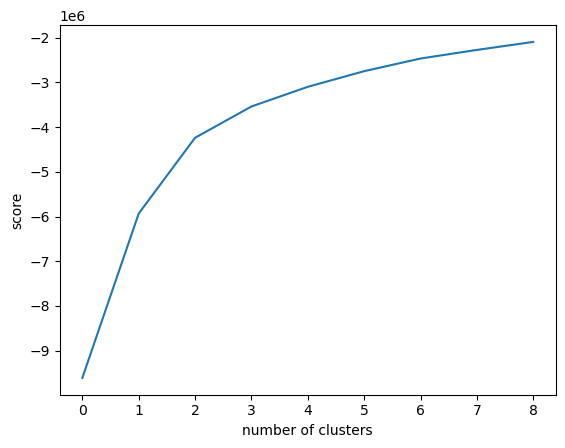

In [23]:
plt.plot(score)
plt.xlabel("number of clusters")
plt.ylabel("score")

## Conclusion:
## From the elbow figure, we can conclude that 3 is the optimal number for clustering.

## 3.2 K-Means clustering

In [24]:
kmeans = KMeans(n_clusters = 3)

In [25]:
kmeans.fit(df_num_all)

KMeans(n_clusters=3)

In [26]:
df_num_all.head(3)

,start_hour,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,trip_duration,age
0,18,40.754666,-73.991382,40.742388,-73.997262,16.55,45
1,18,40.719392,-74.002472,40.728419,-73.987140,9.68,30
2,19,40.760193,-73.991255,40.768254,-73.988639,6.02,24


In [27]:
df_num_all['clusters'] = kmeans.fit_predict(df_num_all)

In [28]:
df_num_all['clusters'].value_counts()

2    23111
1    13229
0     6681
Name: clusters, dtype: int64

## 3.3. Plot clusters and draw conclusions

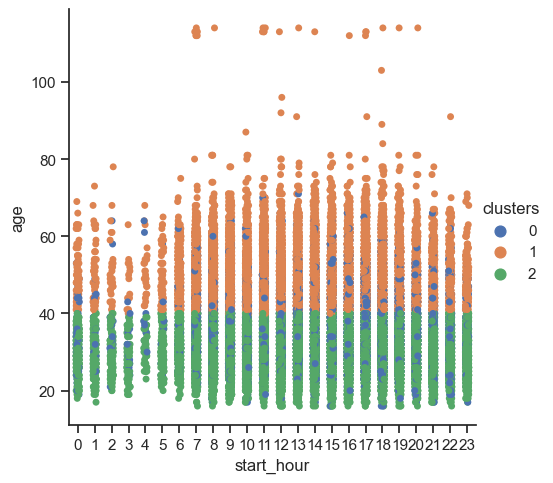

In [29]:
sns.set(style = 'ticks')
g = sns.catplot(x = 'start_hour', y = 'age', hue = 'clusters', data = df_num_all)

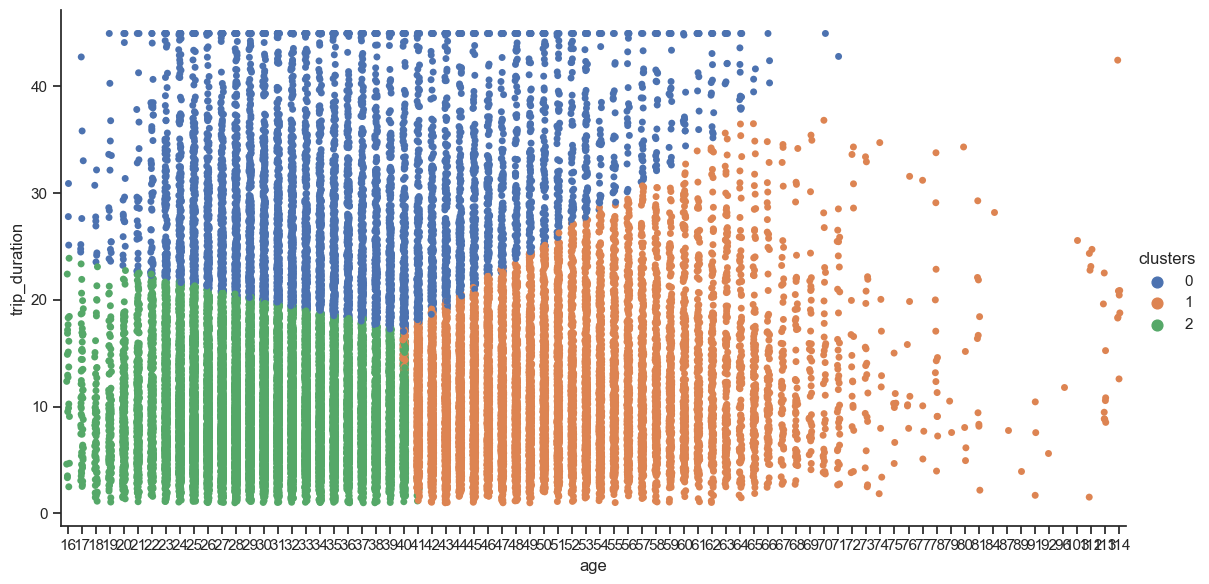

In [30]:
sns.set(style = 'ticks')
g = sns.catplot(x = 'age', y = 'trip_duration', hue = 'clusters', height=6, aspect=11.5/6, data = df_num_all)

## Conclusions:
### 1) Three clusters are detected, and those clusters can be categorized by 'age' and ''trip duration".

### 2) I am not sure if the data has been corretly clustered as in the elbow figure, the line doesn't flat out after 3 (number of the clusters), and occasionally it gives a totally different clustering result when I repeat running the whole codes 